In [1]:
# Load the libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset and create dataframe
df = pd.read_excel('FinancialTies.xlsx', index_col=0)
#This dataset was created via the matrix generator and SP500 companies via the references section. The diagonal of the same companies was overwritten with "0" values to indicate no financial ties with itself.   

# Check the shape of the dataframe
print("DataFrame Dimensions:", df.shape)

# Display a summary of the dataframe
df.info()

# Display the first few rows and columns of the dataframe to confirm it loaded correctly
df_limited = df[df.columns[:10]]
df_limited


DataFrame Dimensions: (200, 200)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Apple Inc to Fortinet Inc
Columns: 200 entries, Apple Inc to Fortinet Inc
dtypes: int64(200)
memory usage: 314.1+ KB


,Apple Inc,Microsoft Corp,Amazon Com Inc,Nvidia Corp,Alphabet Inc Class A,Alphabet Inc Class C,Meta Platforms Inc Class A,Berkshire Hathaway Inc Class B,Tesla Inc,Unitedhealth Group Inc
Apple Inc,0,0,0,0,1,1,0,1,0,1
Microsoft Corp,1,0,1,1,0,0,0,1,1,1
Amazon Com Inc,1,1,0,1,1,0,0,1,0,1
Nvidia Corp,1,0,0,0,0,1,0,0,1,1
Alphabet Inc Class A,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
Paychex Inc,1,0,0,0,0,1,1,1,0,1
Truist Financial Corp,1,0,1,0,1,1,0,0,1,1
Biogen Inc,0,1,0,0,0,0,1,0,0,0
Realty Income Reit Corp,0,1,1,1,0,0,0,1,0,0


In [2]:
# 1) Create a matrix representation of the network.
adjacency_matrix_df = nx.from_pandas_adjacency(df)

In [3]:
# 2) Perform initial descriptive statistics analysis, calculating the following:

# Analyze the matrix to detect potential for alliances.
# Calculate degree centrality
degree_centrality = nx.degree_centrality(adjacency_matrix_df)

# Convert degree centrality dictionary to a dataframe
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['Company', 'Degree Centrality'])

# Sort the dataframe by degree centrality score in descending order
degree_centrality_df_sorted = degree_centrality_df.sort_values(by='Degree Centrality', ascending=False).reset_index(drop=True)

# Reshape the dataframe to have 10 columns
reshaped_df = degree_centrality_df_sorted.T
reshaped_df = reshaped_df.unstack().reset_index(drop=True)

# Reshape back into a dataframe with 10 columns (Confirmed data company/centrality alignment with each of the previous 3 steps) 
reshaped_df = pd.DataFrame(reshaped_df.values.reshape(-1, 10))

# Display the reshaped dataframe
reshaped_df


# Explain what your basis is for establishing the potential for alliances.
# In the analysis of potential alliances within a network, degree centrality was chosen as the primary metric for several reasons in the context of this specific network of companies. Simplicity and Direct Relevance: Degree centrality is a straightforward and intuitive measure of connectivity. It counts the number of direct connections (or ties) each company has with others in the network. For the specific task of identifying potential alliances, the primary concern is often the number of existing direct relationships a company maintains. A company with a high degree centrality is directly connected to many other companies, making it a natural candidate for forming new alliances. The simplicity of degree centrality also makes it easier to interpret and use in practical decision-making processes, such as identifying companies that are already well-integrated into the network and could quickly form new partnerships. Efficiency in Network Exploration: Degree centrality is computationally less intensive compared to more complex centrality measures like betweenness or eigenvector centrality. For large networks, computational efficiency is an important consideration. Degree centrality can be calculated quickly, making it an efficient first step in exploring the network for potential alliances. This efficiency allows for the rapid identification of key companies that could serve as hubs for forming new alliances, which can then be further analyzed using more detailed metrics if necessary. Conclusion: While other centrality measures like betweenness or eigenvector centrality offer deeper insights into a company's position within the broader network, degree centrality was chosen for this analysis because of its direct relevance to identifying well-connected companies that are most likely to form and sustain alliances. Its simplicity, efficiency, and focus on immediate influence make it a suitable choice for the initial exploration of potential alliances within the network. This approach effectively highlights key players who are strategically positioned to expand their network through new alliances. All of the 200 companies were sorted in descending order of their degree centrality scores and of this 200 the top 1% (2 companies) were identified as the best for establishing the potential for alliances. These companies are shown in the dataframe below and were identified as listed 1 and 2:
# 1) Cadence Design Systems Inc (0.844221), 2) Cisco Systems Inc (0.819095)


,0,1,2,3,4,5,6,7,8,9
0,Cadence Design Systems Inc,0.844221,Cisco Systems Inc,0.819095,Equinix Reit Inc,0.819095,Booking Holdings Inc,0.81407,Carrier Global Corp,0.81407
1,On Semiconductor Corp,0.809045,Msci Inc,0.809045,Berkshire Hathaway Inc Class B,0.809045,Altria Group Inc,0.809045,T Mobile Us Inc,0.809045
2,Ecolab Inc,0.80402,Charles Schwab Corp,0.80402,Comcast Corp Class A,0.80402,Starbucks Corp,0.80402,Southern,0.798995
3,Amgen Inc,0.798995,Schlumberger Nv,0.798995,Amazon Com Inc,0.798995,General Motors,0.79397,Walt Disney,0.79397
4,Freeport Mcmoran Inc,0.79397,Sempra,0.79397,Ford Motor Co,0.79397,Monster Beverage Corp,0.79397,Abbvie Inc,0.79397
5,Caterpillar Inc,0.788945,Fiserv Inc,0.788945,Exxon Mobil Corp,0.788945,Coca-Cola,0.788945,Cintas Corp,0.788945
6,Merck & Co Inc,0.788945,Pfizer Inc,0.788945,Intercontinental Exchange Inc,0.788945,Iqvia Holdings Inc,0.788945,Salesforce Inc,0.78392
7,United Parcel Service Inc Class B,0.78392,Paypal Holdings Inc,0.78392,Philip Morris International Inc,0.78392,Cme Group Inc Class A,0.78392,Union Pacific Corp,0.778894
8,Intel Corporation Corp,0.778894,Air Products And Chemicals Inc,0.778894,Target Corp,0.778894,Hess Corp,0.778894,Accenture Plc Class A,0.778894
9,Oreilly Automotive Inc,0.773869,Emerson Electric,0.773869,Duke Energy Corp,0.773869,Prologis Reit Inc,0.773869,Apple Inc,0.773869


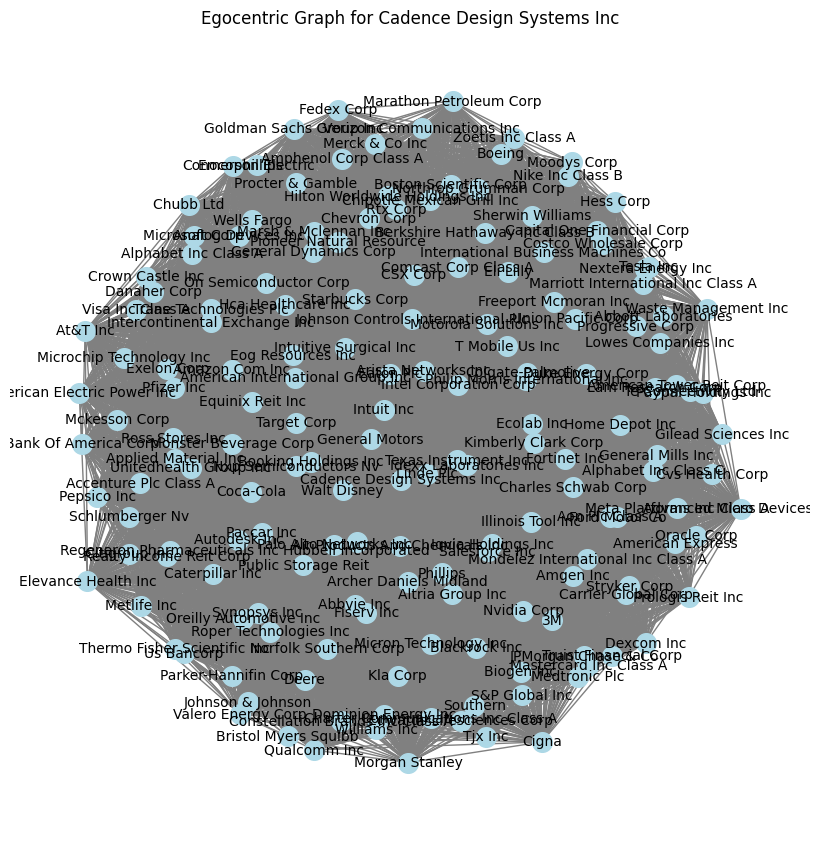

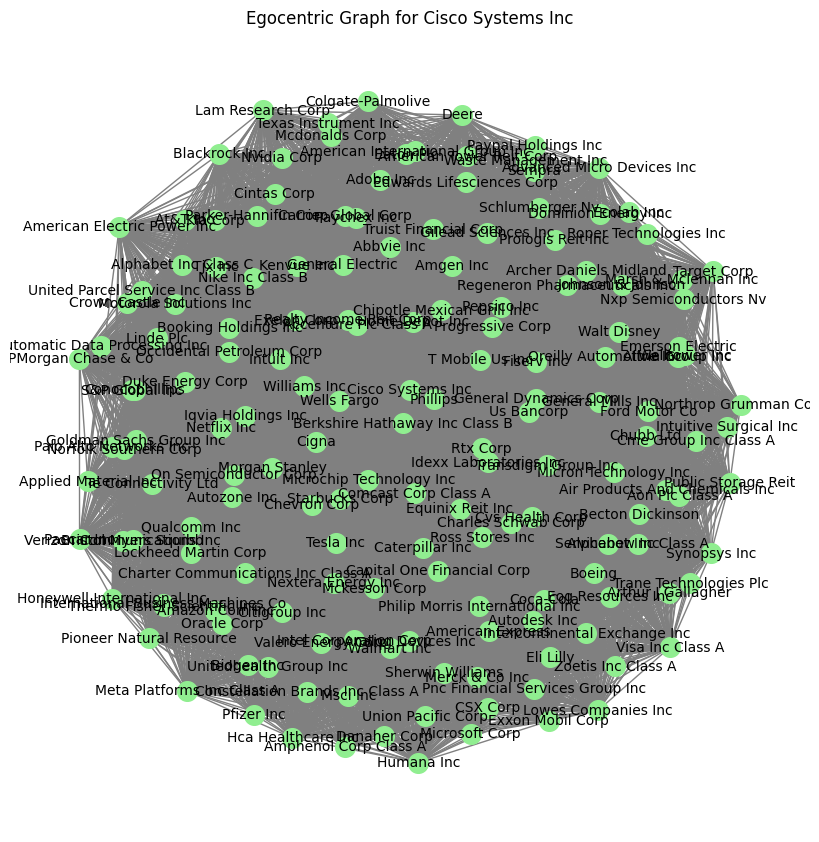

Density of Cadence Design Systems Inc Egocentric Graph: 0.7545787545787546
Density of Cisco Systems Inc Egocentric Graph: 0.7583420619482268
Degree Centrality of Cadence Design Systems Inc in Egocentric Graph: 1.0
Degree Centrality of Cisco Systems Inc in Egocentric Graph: 1.0
Comparison of Density and Centrality:
Cadence Design Systems Inc - Density: 0.7545787545787546 Centrality: 1.0
Cisco Systems Inc - Density: 0.7583420619482268 Centrality: 1.0
Betweenness Centrality of Cadence Design Systems Inc: 0.0026333745369446757
Betweenness Centrality of Cisco Systems Inc: 0.002648460846707401
Closeness Centrality of Cadence Design Systems Inc: 1.0
Closeness Centrality of Cisco Systems Inc: 1.0
Prestige (Eigenvector Centrality b/c Undirected Network) of Cadence Design Systems Inc: 0.10138655518525946
Prestige (Eigenvector Centrality b/c Undirected Network) of Cisco Systems Inc: 0.10238532368736376


In [4]:
# 1) Pick two actors that you have identified as potential allies and perform the following:

# Generate the corresponding egocentric graphs.
# Egocentric graph for Cadence Design Systems Inc
ego_cadence = nx.ego_graph(adjacency_matrix_df, 'Cadence Design Systems Inc')
plt.figure(figsize=(8, 8))
nx.draw(ego_cadence, with_labels=True, node_color='lightblue', edge_color='gray', node_size=200, font_size=10)
plt.title("Egocentric Graph for Cadence Design Systems Inc")
plt.show()

# Egocentric graph for Cisco Systems Inc
ego_cisco = nx.ego_graph(adjacency_matrix_df, 'Cisco Systems Inc')
plt.figure(figsize=(8, 8))
nx.draw(ego_cisco, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=200, font_size=10)
plt.title("Egocentric Graph for Cisco Systems Inc")
plt.show()


# Calculate the density of each egocentric graph.
# Density of egocentric graph for Cadence Design Systems Inc
density_cadence = nx.density(ego_cadence)
print("Density of Cadence Design Systems Inc Egocentric Graph:", density_cadence)

# Density of egocentric graph for Cisco Systems Inc
density_cisco = nx.density(ego_cisco)
print("Density of Cisco Systems Inc Egocentric Graph:", density_cisco)


# Calculate the centrality of each actor.
# Degree centrality for Cadence Design Systems Inc within its egocentric graph
centrality_cadence = nx.degree_centrality(ego_cadence)
print("Degree Centrality of Cadence Design Systems Inc in Egocentric Graph:", centrality_cadence['Cadence Design Systems Inc'])

# Degree centrality for Cisco Systems Inc within its egocentric graph
centrality_cisco = nx.degree_centrality(ego_cisco)
print("Degree Centrality of Cisco Systems Inc in Egocentric Graph:", centrality_cisco['Cisco Systems Inc'])


# For each actor (ego), compare its density and centrality.
print("Comparison of Density and Centrality:")
print("Cadence Design Systems Inc - Density:", density_cadence, "Centrality:", centrality_cadence['Cadence Design Systems Inc'])
print("Cisco Systems Inc - Density:", density_cisco, "Centrality:", centrality_cisco['Cisco Systems Inc'])
# Cadence Design Systems Inc shows a high density, indicating that about 75.46% of its potential connections are realized. The perfect centrality score suggests that Cadence is very well-connected within the network, making it a key player in terms of influence and connectivity. Cisco Systems Inc also exhibits a high density, slightly higher than Cadence, meaning it has a similar, but slightly denser, network of connections at 75.83%. With the same centrality score of 1.0, Cisco is equally influential in the network, reflecting its critical role in maintaining connectivity and influence across the network.


# Calculate the betweenness centrality of each actor.
# Betweenness centrality for Cadence Design Systems Inc
betweenness_cadence = nx.betweenness_centrality(ego_cadence)['Cadence Design Systems Inc']
print("Betweenness Centrality of Cadence Design Systems Inc:", betweenness_cadence)

# Betweenness centrality for Cisco Systems Inc
betweenness_cisco = nx.betweenness_centrality(ego_cisco)['Cisco Systems Inc']
print("Betweenness Centrality of Cisco Systems Inc:", betweenness_cisco)


# Calculate the closeness centrality of each actor.
# Closeness centrality for Cadence Design Systems Inc
closeness_cadence = nx.closeness_centrality(ego_cadence, u='Cadence Design Systems Inc')
print("Closeness Centrality of Cadence Design Systems Inc:", closeness_cadence)

# Closeness centrality for Cisco Systems Inc
closeness_cisco = nx.closeness_centrality(ego_cisco, u='Cisco Systems Inc')
print("Closeness Centrality of Cisco Systems Inc:", closeness_cisco)


# Calculate the prestige of each actor.
# Eigenvector centrality as a proxy for prestige
prestige_cadence = nx.eigenvector_centrality(ego_cadence)['Cadence Design Systems Inc']
print("Prestige (Eigenvector Centrality b/c Undirected Network) of Cadence Design Systems Inc:", prestige_cadence)

# Prestige for Cisco Systems Inc
prestige_cisco = nx.eigenvector_centrality(ego_cisco)['Cisco Systems Inc']
print("Prestige (Eigenvector Centrality b/c Undirected Network) of Cisco Systems Inc:", prestige_cisco)


In [5]:
#For each of the metrics above, explain its meaning in the context of this particular graph.

#1. Density
#	Cadence Design Systems Inc (0.7546) vs. Cisco Systems Inc (0.7583):
#	Meaning: Density in a network refers to the proportion of actual connections to possible connections within a graph. A higher density indicates a more tightly connected network. Both companies have high-density values, meaning their networks are very interconnected, with a large number of ties between the companies in their egocentric graphs. This suggests that both companies have a wide range of financial ties, making them central players in the network with numerous strategic alliances.

#2. Degree Centrality
#	Cadence Design Systems Inc (1.0) vs. Cisco Systems Inc (1.0):
#	Meaning: Degree centrality measures the number of direct connections a node (company) has. Both companies have a degree centrality of 1.0 within their egocentric graphs, indicating they are the most connected nodes in their respective networks. This makes them critical hubs in the network, and good candidates to serve as central figures in financial alliances and decision-making processes.

#3. Betweenness Centrality
#	Cadence Design Systems Inc (0.0026) vs. Cisco Systems Inc (0.0026):
#	Meaning: Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. The low values suggest that neither Cadence Design Systems Inc nor Cisco Systems Inc frequently serve as intermediaries in the shortest paths between other companies. This suggests that while they are highly connected, they are not necessarily crucial for the indirect relationships between other companies in the network.

#4. Closeness Centrality
#	Cadence Design Systems Inc (1.0) vs. Cisco Systems Inc (1.0):
#	Meaning: Closeness centrality measures how close a node is to all other nodes in the network. With a value of 1.0 for both companies, they are at the center of their networks, allowing them to efficiently interact with all other companies. This positioning could be advantageous for quick decision-making and effective communication within the network.

#5. Prestige (Eigenvector Centrality)
#	Cadence Design Systems Inc (0.1014) vs. Cisco Systems Inc (0.1024):
#	Meaning: Eigenvector centrality (used as a proxy for prestige in an undirected network) measures a node's influence based on the connections of its neighbors. Higher values indicate that the company is connected to other well-connected nodes, suggesting that both Cadence Design Systems Inc and Cisco Systems Inc are influential and hold a prestigious position within the network. Cisco Systems Inc slightly outperforms Cadence Design Systems Inc in this metric, indicating a marginally higher influence in the network.

# Overview
# Both Cadence Design Systems Inc and Cisco Systems Inc exhibit strong centrality metrics, making them key players in the network with substantial strategic influence and potential for forming alliances. However, Cisco Systems Inc slightly edges out in terms of eigenvector centrality, indicating a slightly more influential position in the network. Both companies' high density and centrality values make them ideal candidates for strategic partnerships, as they are well-connected and centrally positioned within the network.


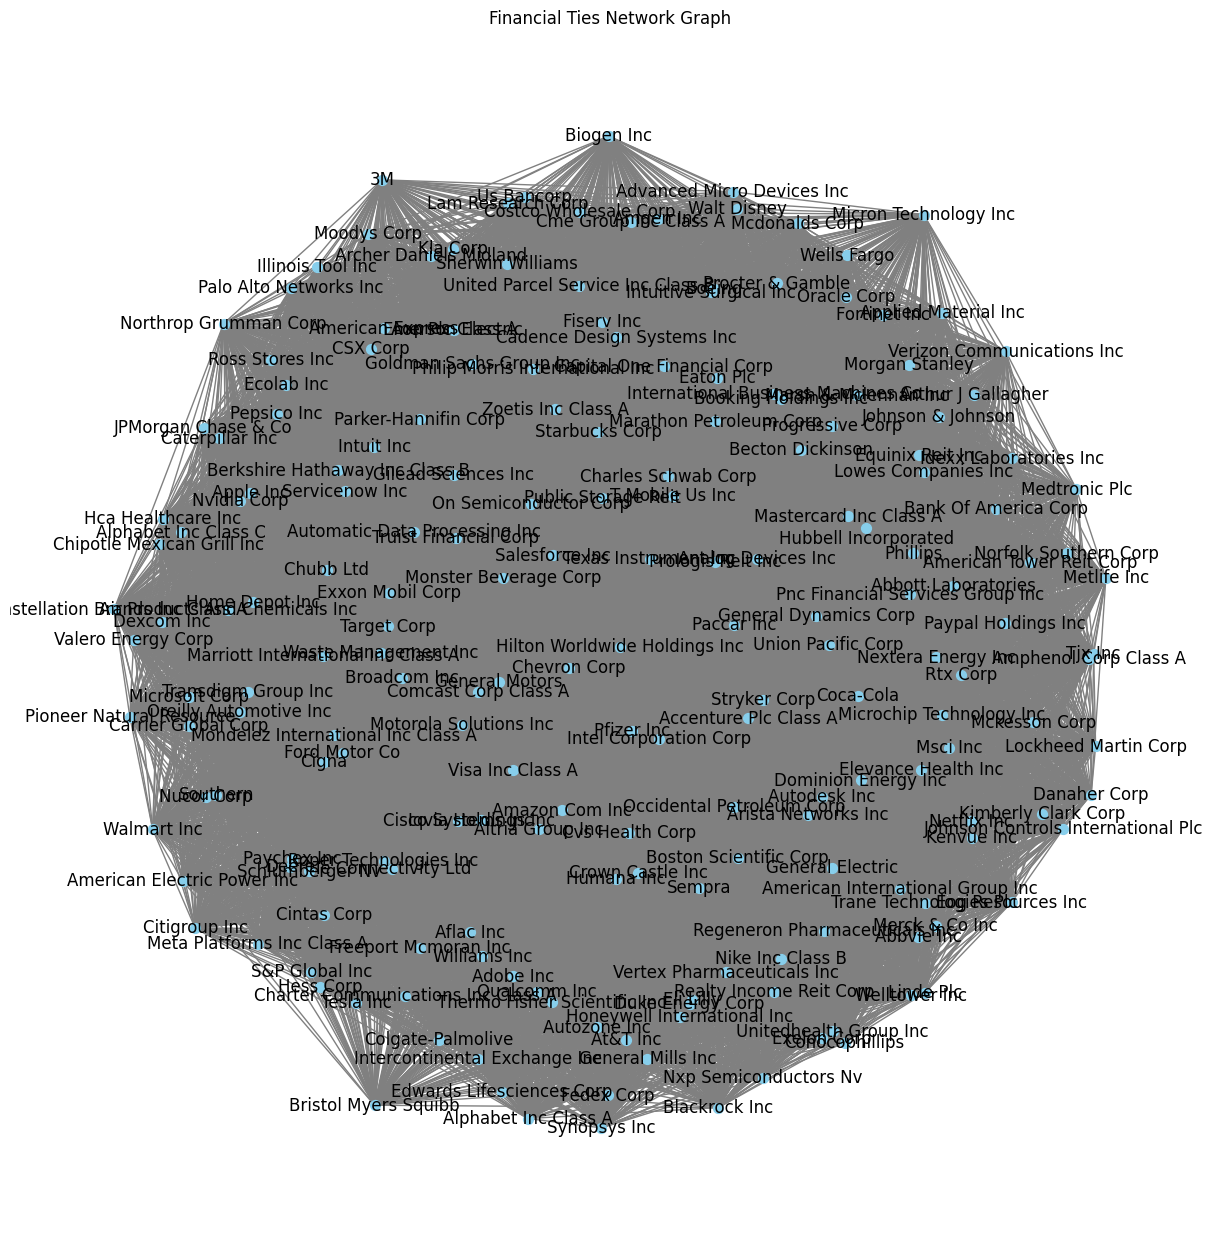

In [6]:
# Plot the network graph and describe the characteristics evident in the plot.
plt.figure(figsize=(12, 12))
nx.draw(adjacency_matrix_df, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray')
plt.title('Financial Ties Network Graph')
plt.show()

# The Financial Ties Network Graph shows several key characteristics:
#1.	Dense Connectivity:
#	The graph shows a high density of edges, which means that many companies are interconnected with numerous financial ties between them. This dense connectivity indicates that the companies in this network have multiple relationships with each other, which could be due to shared investments, partnerships, or other forms of financial interactions.

#2.	Cluster Formation:
#	Although the graph appears densely connected, some clustering is evident where certain groups of companies are more tightly connected within themselves than with others. These clusters could represent industry sectors, regions, or other shared characteristics among the companies that lead to more frequent interactions.

#3.	Prominent Nodes:
#	Some nodes appear more central and connected than others. These prominent nodes might represent companies with higher centrality measures, such as degree centrality, and indicate that they have more direct financial ties to other companies in the network. These companies may act as hubs or key players in the network with significant influence over others.

#4.	Complex Structure:
#	The overall structure of the graph is very complex and has many overlapping edges. This complexity makes it challenging to visually identify specific subgroups or individual connections without further analysis. However, this reflects the intricate and multifaceted nature of financial relationships among large corporations.

#5.	Lack of Clear Hierarchy:
#	The network does not appear to have a clear hierarchical structure. Instead, it resembles a more distributed network where many companies have similar levels of connections. This could suggest a decentralized financial network where no single company dominates the network.

#6.	Challenges in Visualization:
#	Due to the large number of nodes and edges, the graph appears cluttered, making it difficult to discern individual connections or node labels. This visualization challenge is common in large networks and may necessitate the use of filtering or zooming techniques to focus on specific parts of the network for detailed analysis.

# Overview:
# Overall, the Financial Ties Network Graph provides a broad overview of the financial relationships among the companies in the dataset, highlighting the dense and interconnected nature of the network. Further analysis, such as community detection or centrality measures, would be needed to draw more specific conclusions from this graph.


In [7]:
# Analyze the matrix to identify the impact of interlocking boards.

# Interlocking boards occur when members of a company's board of directors also serve on the boards of other companies. This can lead to a network of interconnected companies where strategic decisions, information, and influence can flow across corporate boundaries. Analyzing the impact of interlocking boards within the given financial ties network involves identifying companies with shared board members and understanding how these connections might affect strategic alliances, corporate governance, and market competition. How to Analyze Interlocking Boards: Identify pairs or groups of companies in the matrix that are connected through shared board members. In this binary matrix, this could be determined by looking for rows and columns with similar connection patterns (i.e., where the same companies are marked with a "1").


In [8]:
# Analyze the matrix to identify strategic opportunities that would benefit entities (e.g., find a partner, create/join an alliance, prevent an alliance, access a new market, etc.).

# Betweenness Centrality + Closeness Centrality: This combination is powerful for identifying strategic opportunities because it not only highlights entities that control key network positions (betweenness) but also those that can quickly access and influence the entire network (closeness). Together, they provide a comprehensive view of potential strategic partners or threats. Based on the analysis of Betweenness Centrality and Closeness Centrality below, strategic alliances can be identified by considering companies that rank high in both metrics. These companies are central to the network and have the potential to influence or quickly access the entire network, making them valuable partners for collaboration, alliances, or market expansion.
#Top 3 Strategic Alliances:
# Cadence Design Systems Inc & Cisco Systems Inc
# Cadence Design Systems Inc ranks highest in both Betweenness (0.0016) and Closeness (0.8652) Centrality, indicating it is a key influencer and well-connected in the network. Cisco Systems Inc is close behind in both measures, making these companies ideal partners to enhance their influence and reach within the network.

# Equinix Reit Inc & Booking Holdings Inc
# Equinix Reit Inc and Booking Holdings Inc both rank highly in Betweenness (0.0015) and Closeness (0.8468 for Equinix and 0.8432 for Booking). Their strong network positions make them strategic partners for accessing new markets or forming a powerful alliance.

# Carrier Global Corp & Berkshire Hathaway Inc Class B
# Carrier Global Corp and Berkshire Hathaway Inc Class B have similar strong positions in the network (Betweenness 0.0014 and Closeness 0.8432 for Carrier, 0.8397 for Berkshire). An alliance between them could lead to significant market influence and operational synergies.


# Calculate Betweenness Centrality Sorted Descending
betweenness = nx.betweenness_centrality(adjacency_matrix_df)
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))

# Calculate Closeness Centrality Sorted Descending
closeness = nx.closeness_centrality(adjacency_matrix_df)
sorted_closeness = dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True))

# Print the results side by side
print(f"{'Node':<30} {'Betweenness Centrality':<25} {'Closeness Centrality':<25}")
print("="*80)
for (node_b, centrality_b), (node_c, centrality_c) in zip(sorted_betweenness.items(), sorted_closeness.items()):
    print(f"{node_b:<30} {centrality_b:<25.4f} {node_c:<30} {centrality_c:.4f}")


Node                           Betweenness Centrality    Closeness Centrality     
Cadence Design Systems Inc     0.0016                    Cadence Design Systems Inc     0.8652
Equinix Reit Inc               0.0015                    Cisco Systems Inc              0.8468
Cisco Systems Inc              0.0015                    Equinix Reit Inc               0.8468
Carrier Global Corp            0.0014                    Booking Holdings Inc           0.8432
Berkshire Hathaway Inc Class B 0.0014                    Carrier Global Corp            0.8432
Booking Holdings Inc           0.0014                    Berkshire Hathaway Inc Class B 0.8397
Msci Inc                       0.0014                    Altria Group Inc               0.8397
On Semiconductor Corp          0.0014                    T Mobile Us Inc                0.8397
Altria Group Inc               0.0014                    Msci Inc                       0.8397
Charles Schwab Corp            0.0014                    On Se

In [9]:
# Point out examples of weak and strong ties within the organization (two examples of each) and explain why they are weak or strong.

# To identify and classify ties as weak or strong within this network, we can again consider both Betweenness and Closeness Centrality metrics, which provide insights into the connectivity and influence of nodes (companies) in the network. Strong ties are usually characterized by frequent, direct interactions or collaborations between two companies. Strong ties are often found where companies have mutual interests, shared resources, or ongoing partnerships. High Betweenness and Closeness might contribute to strong ties, but these metrics alone don’t guarantee them and the same is the case low metrics and weak ties.
#Strong Ties: Are typically characterized by high Betweenness and Closeness Centrality. These ties often indicate close, direct relationships and significant influence within the network, enabling quick and efficient communication or collaboration.
# 1) Cadence Design Systems Inc & Cisco Systems Inc: Both companies rank very highly in Betweenness and Closeness Centrality, making their connection a strong tie. This implies that they are central to the network, with a high level of influence and access to other nodes. Their strong positions suggest they can directly influence each other and share resources efficiently, making their relationship robust and impactful within the network.
# 2) Equinix Reit Inc & Booking Holdings Inc: Similar to the previous example, both companies have high centrality measures. Their strong tie is indicated by their ability to influence a large part of the network directly. The strong connection here suggests that any collaboration or communication between these two entities is likely to be efficient, with substantial reach and impact.

# Weak Ties: Are often characterized by lower Betweenness and Closeness Centrality scores. These ties represent less direct influence or interaction within the network, which can be beneficial for accessing diverse, non-redundant information or connections.
# 1) Becton Dickinson & Bristol Myers Squibb: These companies have low Betweenness and Closeness Centrality, indicating weaker ties in the network. While they are still connected, their influence is likely limited, and their connection does not facilitate efficient or widespread communication within the network. These weaker ties may serve as bridges to less central or isolated parts of the network, providing access to unique information or resources, but without the same level of direct influence.
# 2) Citigroup Inc & 3M: Similar to the previous example, Citigroup Inc and 3M have lower centrality scores, indicating weaker ties. Their positions suggest that while they are part of the network, their ability to influence or access the network efficiently is limited. 


In [10]:
# Detect structural holes and explain their impact on social closures.

# Structural Holes: A structural hole exists in a network when there is a gap between two or more groups or nodes that are not directly connected. These gaps represent opportunities where a broker or intermediary can bridge the disconnect and potentially control the flow of information, resources, or influence between the separated groups.
# Social Closure: Social closures occur when members of a social network are tightly interconnected, forming a cohesive group with strong ties. In these groups, information and resources circulate freely within the group, but access to external information or resources might be limited. Social closures typically have trust and strong collaboration but can also lead to groupthink or resistance to new ideas or processes.
# Detecting Structural Holes: To visually detect structural holes in a network, it’s best to look for nodes or groups of nodes that are poorly connected to other parts of the network. Visually Netflix Inc (outside right) and Excelon Corp (top middle) appear to be isolated so could have significant structural holes.  
# Impact of Structural Holes on Social Closure: Structural holes provide opportunities for certain other nodes (facilitators) to occupy strategic positions in the network. These facilitators can benefit from controlling the flow of information and resources between disconnected groups. By doing so, they can increase their influence, extract value, and act as gatekeepers. Structural holes can also lead to greater innovation and exposure to new ideas. Facilitators can bring in diverse perspectives from outside the group, which can prevent the group from becoming too insular or resistant to new information. So while social closure is weakened, the group might benefit from more diverse and innovative inputs.


In [11]:
# Analyze the matrix to identify challenges entities may face (e.g., unreachable entities, overcrowded regions [competition], difficulty [e.g., expensive networking cost] in connecting with certain companies, etc.).

# To analyze the matrix and identify challenges entities may face, the factors below can be considered:
#1. Unreachable Entities:
#	Peripheral Companies: Entities located on the periphery of the network, such as Netflix and Exelon Corp may face challenges in accessing the core of the network. These companies may have limited connections, making it harder for them to reach or influence more central entities.
#	Structural Holes: Companies that are isolated or only weakly connected to the rest of the network may also be considered as facing the challenge of being unreachable. This can result in a lack of information flow, missed opportunities for collaboration, and overall reduced influence within the network.

#2. Overcrowded Regions (Competition):
#	Central Nodes: Companies with high betweenness and closeness centrality scores are often central within the network, meaning they have many connections or are close to many other companies. However, these regions of the network may be overcrowded, leading to intense competition for resources, partnerships, and market opportunities. Companies in these areas (such as Cadence Design Systems Inc and Cisco Systems Inc) may find it challenging to stand out or maintain competitive advantages.
#	Network Congestion: In overcrowded regions, companies might experience network congestion, where the sheer number of connections and interactions can lead to information overload or difficulty in managing relationships effectively.

#3. Difficulty in Connecting with Certain Companies:
#	High Networking Costs: Companies that are on the outskirts of the network, or those that need to connect with entities that are far removed from their current connections, may face high networking costs. These costs could be related to the resources required to establish and maintain these connections or the strategic investments needed to bridge structural holes.
#	Disconnected Components: If the network has any disconnected components or if certain companies are only weakly connected to the rest of the network, it might be challenging for entities to form strategic alliances or partnerships. This can be particularly problematic in trying to access new markets or introduce innovations that require collaboration.

#4. Vulnerability to Disruption:
#	Dependence on Central Nodes: If a company’s position within the network heavily relies on a few central entities, it might be vulnerable to disruptions if those central nodes experience issues (e.g., financial troubles, loss of influence). This dependency can make certain companies less resilient to changes within the network.


In [12]:
# Based on the analysis of this network, how do you view the impact of informal networks on the power structure of organizations?

# Informal networks exert a subtle and often significant influence on the power dynamics within organizations and  frequently operate in parallel to or even in contrast with the formal structures. Analyzing the network reveals several key ways in which these informal connections shape the overall power structure as touched on below:
#1. Enhancement of Influence Beyond Formal Roles:
#	Centralized Influence: Individuals or entities that occupy central positions within the informal network often hold considerable power, regardless of their formal titles or roles. For instance, those with high betweenness centrality can influence the organization by controlling the pathways through which information and resources flow. This centrality allows them to act as gatekeepers or power facilitators, effectively shaping decisions and alliances within the organization.
#	Network Leverage: The ability to leverage a wide array of connections across different areas of the organization can grant these central figures the power to navigate and manipulate both formal and informal channels. This enhances their influence far beyond what is officially known and apparent.

#2. Peripheral Players and Emerging Power:
#	Niche Influence: Entities that appear to be on the fringes of the network might initially seem less powerful, but their connections to external networks or distinct groups can make them vital sources of new ideas, innovations, or market intelligence. Their ability to introduce new perspectives or resources into the organization can challenge the existing power hierarchy, which can make them unexpected but significant influencers.
#	Catalysts for Change: These peripheral players can become catalysts for change, especially when they introduce disruptive innovations or ideas that the central network has overlooked. This can shift the power balance within the organization and elevate the status of these previously marginalized entities.

#3. Structural Holes and Their Role in Power Dynamics:
#	Facilitators and Control: The presence of structural holes creates opportunities for certain entities to act as facilitators. Those who fill these gaps can wield considerable power by connecting otherwise isolated groups, controlling the flow of information, and influencing key decisions. This facilitator role can elevate an entity’s influence and allow them to shape the organization’s strategic direction in ways that might not be visible through formal structures.
#	Disruption of Social Cohesion: Structural holes can also disrupt the formation of cohesive, tightly-knit groups within the organization. While this might reduce the strength of social ties, it can also prevent the centralization of power within any one group, fostering a more dynamic and flexible organization less prone to group think. 

#Conclusion:
#Informal networks have a profound impact on the power structures within organizations. They can enhance the influence of individuals beyond their formal roles, introduce innovation and change from the periphery, and provide alternative sources of power and resistance. By understanding and strategically navigating these informal networks, organizations can foster a more dynamic and resilient power structure that is better equipped to handle internal and external challenges.


In [17]:
#References
# World's Simplest Math Tool. (n.d.). Random Matrix Generator. Retrieved August 18, 2024, from https://onlinetools.com/math/generate-random-matrix

# TopForeignStocks.com. (2024, August 10). The Complete List of Constituents of the S&P 500 Index. Retrieved August 18, 2024, from https://topforeignstocks.com/indices/components-of-the-sp-500-index/#google_vignette

# Stanford News. (2023, July 24). 50 years on, Mark Granovetter’s ‘The Strength of Weak Ties’ is stronger than ever. Stanford News. Retrieved from https://news.stanford.edu/stories/2023/07/strength-weak-ties

# ScienceDirect. (n.d.). Degree centrality. Retrieved from https://www.sciencedirect.com/topics/computer-science/degree-centrality

# ScienceDirect. (n.d.). Betweenness centrality. In Computer Science. Retrieved from https://www.sciencedirect.com/topics/computer-science/betweenness-centrality

# ScienceDirect. (n.d.). Closeness centrality. In Computer Science. Retrieved from https://www.sciencedirect.com/topics/computer-science/closeness-centrality

